In [1]:
import pandas as pd
import numpy
import nltk
import os
!ls
from nltk.stem import PorterStemmer as PS
from string import punctuation
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

train = pd.read_csv("updated_train.csv")
test  = pd.read_csv("updated_test.csv")
train.head()



Baseline_Model_EDA.ipynb
__init__.py
__pycache__
functions.py
updated_ss.csv
updated_test.csv
updated_train.csv


C:\Users\Maria\AppData\Roaming\Python\Python37\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,ID,text,target
0,train_0,The bitcoin halving is cancelled due to,1
1,train_1,MercyOfAllah In good times wrapped in its gran...,0
2,train_2,266 Days No Digital India No Murder of e learn...,1
3,train_3,India is likely to run out of the remaining RN...,1
4,train_4,In these tough times the best way to grow is t...,0


In [2]:
def plot_decision_boundaries(X, y, model_class, **model_params):
    """
    Function to plot the decision boundaries of a classification model.
    This uses just the first two columns of the data for fitting 
    the model as we need to find the predicted value for every point in 
    scatter plot.
    Arguments:
            X: Feature data as a NumPy-type array.
            y: Label data as a NumPy-type array.
            model_class: A Scikit-learn ML estimator class 
            e.g. GaussianNB (imported from sklearn.naive_bayes) or
            LogisticRegression (imported from sklearn.linear_model)
            **model_params: Model parameters to be passed on to the ML estimator
    
    Typical code example:
            plt.figure()
            plt.title("KNN decision boundary with neighbros: 5",fontsize=16)
            plot_decision_boundaries(X_train,y_train,KNeighborsClassifier,n_neighbors=5)
            plt.show()
    """
    import numpy as np
    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print("Coercing input data to NumPy arrays failed")
    # Reduces to the first two columns of data
    reduced_data = X[:, :2]
    # Instantiate the model object
    model = model_class(**model_params)
    # Fits the model with the reduced data
    model.fit(reduced_data, y)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].    

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    # Meshgrid creation
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predictions to obtain the classification results
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plotting
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.xlabel("Feature-1",fontsize=15)
    plt.ylabel("Feature-2",fontsize=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    return plt

# Data Cleaning

In [3]:
stemmer = PS()
stop = nltk.corpus.stopwords.words("english")+list(punctuation)
def cleaner(text):
    text =text.lower()
    text = nltk.word_tokenize(text)
    new = []
    for i in text:
        if not i in stop:
            new.append(stemmer.stem(i))
        else:
            pass
    return new

train["cleaned"] =list(map(cleaner,train.text))
train.head()

,ID,text,target,cleaned
0,train_0,The bitcoin halving is cancelled due to,1,"[bitcoin, halv, cancel, due]"
1,train_1,MercyOfAllah In good times wrapped in its gran...,0,"[mercyofallah, good, time, wrap, granular, det..."
2,train_2,266 Days No Digital India No Murder of e learn...,1,"[266, day, digit, india, murder, e, learn, 2g,..."
3,train_3,India is likely to run out of the remaining RN...,1,"[india, like, run, remain, rna, kit, essenti, ..."
4,train_4,In these tough times the best way to grow is t...,0,"[tough, time, best, way, grow, learn, case, te..."


In [4]:
corona = train[train.target==1]
cor = []
for i in corona.cleaned:
    cor+=i
from collections import Counter

coronas = dict(Counter(cor)); print(len(coronas))

6387


In [5]:
not_corona = train[train.target==0]
non_cor = []
for i in not_corona.cleaned:
    non_cor+=i
from collections import Counter

non_corona = dict(Counter(non_cor));print(len(non_corona))

7285


In [100]:
def data_gen(n):
    pos = 0
    neg = 0
    for i in n:
        pos+=(coronas.get(i,0)+1)/
        neg+=(non_corona.get(i,0)+1)
    return pos,neg
trans = pd.DataFrame(list(map(data_gen,train.cleaned)),columns = ["corona","non_corona"])
trans["null"] = True
trans["labels"] = train.target
trans.head()

,corona,non_corona,labels
0,69,30,1
1,237,593,0
2,477,583,1
3,553,438,1
4,618,1375,0


In [101]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
train["cleaned1"] =[" ".join(i) for i in train.cleaned]
vect = CountVectorizer()
vectors = vect.fit_transform(train.cleaned1).toarray()

# Graph

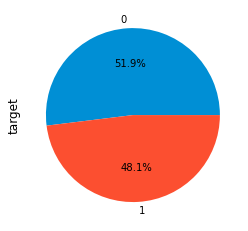

In [8]:
train.target.value_counts().plot(kind = "pie", autopct='%1.1f%%')

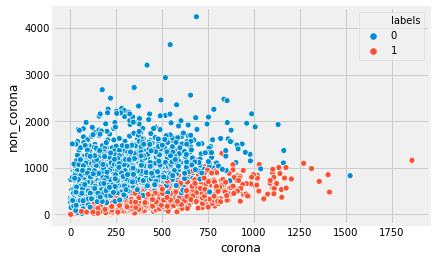

In [9]:
sns.scatterplot(data = trans,
               x = "corona",
               y = "non_corona",
           hue = "labels"
          )

# Models (First Dataset)

In [102]:
from sklearn.model_selection import train_test_split

x = trans[['corona', 'non_corona',"lambda"]]
y = ["Corona" if i==1 else "Non_corona" for i in  trans['labels']]

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 2);print(x_train.shape,x_test.shape)

KeyError: "['lambda'] not in index"

In [80]:
from functions import plot_decision_boundaries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression as LR

model = LR()
#model = GradientBoostingClassifier()
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [81]:
pred1 = model.predict_proba(x_test)
preds = model.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,log_loss

print(classification_report(preds,y_test));print(confusion_matrix(preds,y_test));print(accuracy_score(preds,y_test))
log_loss(y_test,pred1)

              precision    recall  f1-score   support

      Corona       0.95      0.86      0.90       684
  Non_corona       0.86      0.95      0.90       638

    accuracy                           0.90      1322
   macro avg       0.90      0.90      0.90      1322
weighted avg       0.91      0.90      0.90      1322

[[587  97]
 [ 33 605]]
0.9016641452344932


0.24737762292987486

# Test the data

In [82]:
test["test1" ]= list(map(cleaner,test.text))
test.head()

,ID,text,test1
0,test_2,Why is explained in the video take a look,"[explain, video, take, look]"
1,test_3,Ed Davey fasting for Ramadan No contest,"[ed, davey, fast, ramadan, contest]"
2,test_4,Is Doja Cat good or do you just miss Nicki Minaj,"[doja, cat, good, miss, nicki, minaj]"
3,test_8,How Boris Johnson s cheery wounded in action p...,"[bori, johnson, cheeri, wound, action, persona..."
4,test_9,Man it s terrible Not even a reason to get on ...,"[man, terribl, even, reason, get, sport, start..."


In [83]:
test1  = pd.DataFrame(list(map(data_gen,test.test1)),columns = ["corona","non_corona"])
test1['ID'] = test.ID
test1 = test1[['ID',"corona","non_corona"]]
test1.head()

,ID,corona,non_corona
0,test_2,164,188
1,test_3,6,921
2,test_4,50,264
3,test_8,268,249
4,test_9,304,807


In [84]:
test1["target"] = model.predict_proba(test1[["corona","non_corona"]])[:,1]
final_df = test1[["ID","target"]]
final_df.to_csv("Final_dfLR.csv")

ValueError: X has 2 features per sample; expecting 5